In [106]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [107]:
class Agent:
    def __init__(self, n):
        self.x = np.random.randint(0, n)
        self.y = np.random.randint(0, n)

    def move(self, n):
        self.x = (self.x + np.random.choice([-1, 0, 1])) % n
        self.y = (self.y + np.random.choice([-1, 0, 1])) % n

In [108]:
class Model:
    def __init__(self, n, dirt_percentage, num_agents, cleaning_check_time):
        self.n = n
        self.dirt_percentage = dirt_percentage
        self.cleaning_check_time = cleaning_check_time
        self.room = self.initializeRoom()
        self.agents = [Agent(n) for _ in range(num_agents)]
        self.clean_percentage_over_time = []
        
    def initializeRoom(self):
        room = np.zeros((self.n, self.n), dtype=int)
        num_dirty_cells = int(self.dirt_percentage * self.n * self.n)
        dirty_cells = random.sample(range(self.n * self.n), num_dirty_cells)
        for cell in dirty_cells:
            room[cell // self.n, cell % self.n] = 1  # 1 representa una celda sucia
        return room
    
    def step(self):
        for agent in self.agents:
            if self.room[agent.x, agent.y] == 1:
                self.room[agent.x, agent.y] = 0  # Limpiar la celda sucia
            else:
                agent.move(self.n)
        clean_percentage = np.sum(self.room == 0) / (self.n * self.n)
        self.clean_percentage_over_time.append(clean_percentage)
    
    def run(self):
        for _ in range(self.cleaning_check_time):
            self.step()
            if np.sum(self.room == 0) == self.n * self.n:
                break
        return self.clean_percentage_over_time

Running simulation with 1 agents for 500 steps...
Results: Clean cells after 500 steps with 1 agents: 50.24999999999999%
Running simulation with 5 agents for 500 steps...
Results: Clean cells after 500 steps with 5 agents: 92.75%
Running simulation with 10 agents for 500 steps...
Results: Clean cells after 500 steps with 10 agents: 100.0%


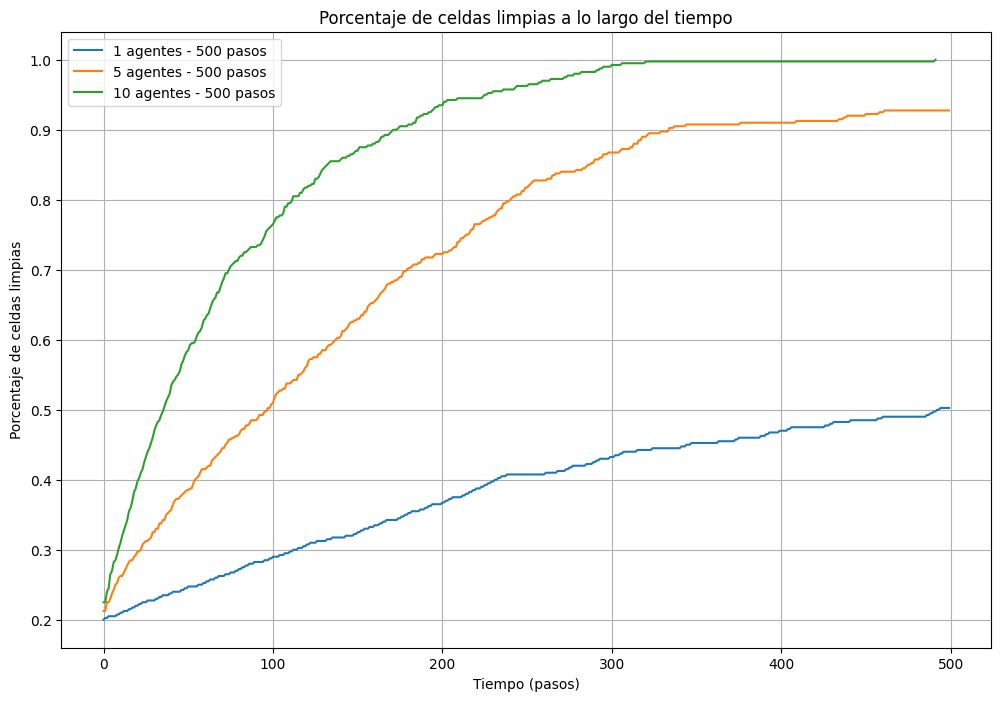

In [109]:
# Configuración de la simulación
n = 20  
agent_counts = [1, 5, 10]
dirt_percentage = 0.8  
cleaning_check_time = [500]

# Ejecutar la simulación para diferentes números de agentes y tiempos de verificación
plt.figure(figsize=(12, 8))

for agents in agent_counts:
    for check_time in cleaning_check_time:
        print(f"Running simulation with {agents} agents for {check_time} steps...")
        model = Model(n, dirt_percentage, agents, check_time)
        clean_percentage_over_time = model.run()
        
        # Graficar el porcentaje de celdas limpias a lo largo del tiempo
        plt.plot(range(len(clean_percentage_over_time)), clean_percentage_over_time, label=f'{agents} agentes - {check_time} pasos')

        clean_cells_after_check_time = clean_percentage_over_time[-1]
        print(f"Results: Clean cells after {check_time} steps with {agents} agents: {clean_cells_after_check_time * 100}%")

# Configuración de la gráfica
plt.xlabel('Tiempo (pasos)')
plt.ylabel('Porcentaje de celdas limpias')
plt.title('Porcentaje de celdas limpias a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()
